In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('C:/Users/Prachi/Desktop/technocolabs/project 2 and 3/Data set/cleaned_data.csv')
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,...,657,1000,1000,800,0,graduate school,1,0,0,0
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,...,38000,20239,13750,13770,0,graduate school,1,0,0,0
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,...,0,581,1687,1542,0,university,0,0,0,1
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,...,432,1000,1000,1000,0,high school,0,1,0,0
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,1122,0,0,high school,0,1,0,0


In [2]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

In [6]:
params = {
    'max_depth':[3,6,9,12],
    'n_estimators':[10,50,100,200]
}

In [7]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(rf, param_grid=params, scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=4, verbose=2,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [8]:
grid_cv.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=10, total=   0.4s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s



[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.8s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   1.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.8s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.8s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .................... max_depth=3, n_estimators=100, total=   1.5s
[CV] 

[CV] ................... max_depth=12, n_estimators=200, total=   9.4s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   9.5s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   9.3s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   9.2s


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  3.3min finished
C:\Users\Prachi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [9]:
grid_cv_results_df = pd.DataFrame(grid_cv.cv_results_)
grid_cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.206123,0.088771,0.008745,0.000829,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.739183,0.746599,0.772127,0.771322,0.757308,0.014656,15,0.767973,0.767158,0.760550,0.763683,0.764841,0.002955
1,0.832235,0.119522,0.026235,0.001299,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.748009,0.755878,0.779465,0.771250,0.763651,0.012379,12,0.775241,0.774025,0.765732,0.766947,0.770486,0.004191
2,1.615750,0.128805,0.061713,0.011642,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.747221,0.753924,0.779195,0.770937,0.762819,0.012811,13,0.774340,0.773598,0.766103,0.766914,0.770238,0.003750
3,3.382157,0.167894,0.104186,0.011226,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747454,0.753057,0.777644,0.771729,0.762471,0.012550,14,0.774453,0.773534,0.766139,0.767404,0.770382,0.003653
4,0.250344,0.011140,0.009245,0.000433,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.752905,0.758904,0.780036,0.774017,0.766466,0.010980,11,0.795911,0.796476,0.793695,0.796446,0.795632,0.001141
5,1.556287,0.263034,0.043723,0.009517,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.760089,0.765251,0.788567,0.778669,0.773144,0.011193,8,0.807081,0.805109,0.799176,0.801229,0.803149,0.003113
6,2.461477,0.107903,0.064210,0.006865,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.760964,0.765515,0.788793,0.778936,0.773552,0.011004,7,0.808194,0.806130,0.800846,0.803123,0.804573,0.002808
7,5.220770,0.188945,0.122424,0.002499,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.761481,0.765319,0.787854,0.779745,0.773600,0.010682,6,0.808276,0.806853,0.800682,0.804006,0.804954,0.002906
8,0.368271,0.015230,0.013993,0.000706,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.757853,0.755444,0.781544,0.773823,0.767166,0.010899,10,0.854161,0.856197,0.850317,0.852039,0.853178,0.002211
9,1.811630,0.142759,0.047471,0.008011,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.763956,0.764420,0.786690,0.780255,0.773830,0.009908,4,0.867242,0.871380,0.868213,0.867390,0.868557,0.001672


In [10]:
grid_cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

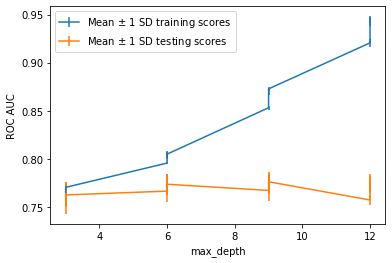

In [11]:
ax = plt.axes()
ax.errorbar(grid_cv_results_df['param_max_depth'],
            grid_cv_results_df['mean_train_score'],
            yerr=grid_cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(grid_cv_results_df['param_max_depth'],
            grid_cv_results_df['mean_test_score'],
            yerr=grid_cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.show()

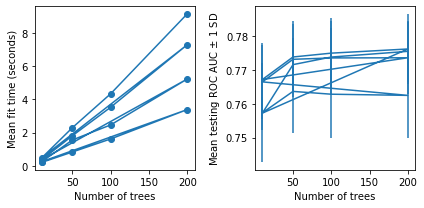

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(grid_cv_results_df['param_n_estimators'],
            grid_cv_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(grid_cv_results_df['param_n_estimators'],
                grid_cv_results_df['mean_test_score'],
                yerr=grid_cv_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

In [13]:
grid_cv.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [14]:
# Create a 5x5 grid
x_coordi, y_coordi = np.meshgrid(range(5), range(5))
z_coordi = grid_cv_results_df.mean_test_score.values.reshape(4,4)
print(x_coordi)
print(y_coordi)
print(z_coordi)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
[[0.75730766 0.76365051 0.76281941 0.76247114]
 [0.7664656  0.77314378 0.77355231 0.77359992]
 [0.76716589 0.77383029 0.77496884 0.77619851]
 [0.75722825 0.77157003 0.77381473 0.77549938]]


In [15]:
# Set color map to `plt.cm.jet`
color_map = plt.cm.jet

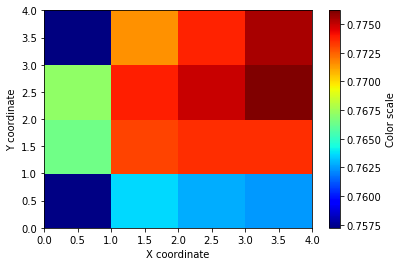

In [16]:
# Visualize pcolormesh
ax = plt.axes()

pcolor_ex = ax.pcolormesh(x_coordi, y_coordi, z_coordi, cmap = color_map)

plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
plt.show()

In [17]:
# Create a dataframe of the feature names and importance
feature_importance_df = pd.DataFrame({
    'Feature Name': features_response[:-1],
    'Importance': grid_cv.best_estimator_.feature_importances_})

In [18]:
# Sort values by importance
feature_importance_df.sort_values("Importance", ascending = False)

,Feature Name,Importance
4,PAY_1,0.437439
0,LIMIT_BAL,0.059961
11,PAY_AMT1,0.059434
12,PAY_AMT2,0.045518
13,PAY_AMT3,0.043299
5,BILL_AMT1,0.042195
6,BILL_AMT2,0.041562
7,BILL_AMT3,0.037268
14,PAY_AMT4,0.034321
8,BILL_AMT4,0.034123
